# Worst-case example visualization

* To visualize worst-case outlier examples in test OOD dataset

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import numpy as np
import copy
import matplotlib.gridspec as gridspec

import sys
sys.path.append('../')
from loader import get_dataloader

## SVHN

In [6]:
size = 32; channel = 3
data_dict = {
    "path": "../datasets",
    "size": size,
    "channel": channel,
    "batch_size": 64,
    "n_workers": 4,
    "split": "evaluation",
    #              'split': 'validation',
}
data_dict_ = copy.copy(data_dict)
data_dict_['dataset'] = 'SVHN_OOD'
out_dl = get_dataloader(data_dict_)
out_ds = out_dl.dataset

Using No Augmentations
Using No Augmentations
Using downloaded and verified file: ../datasets/test_32x32.mat


In [7]:
l_detector = [('oe', 'pretrained/cifar_ood_oe_scratch/allconv/'), 
              ('md', 'pretrained/cifar_ood_md/md_resnet'),
              ('rowl', 'pretrained/cifar_ood_atom/rowl'),
              ('good', 'pretrained/cifar_ood_good/good80'),
              ('atom', 'pretrained/cifar_ood_atom/atom'),
              ('csi', 'pretrained/cifar_ood_csi')]

In [10]:
n_vis = 16
data = []
for detector_name, detector_path in l_detector:
    out_scores = torch.load(f'../{detector_path}/OOD_score_SVHN_OOD.pkl')    
    out_sorted_score, out_sorted_idx = torch.sort(out_scores)
    l_sorted_img = [out_ds[s][0].permute(1,2,0) for s in out_sorted_idx[:n_vis]]
    
    # score to rank
    in_scores = torch.load(f'../{detector_path}/IN_score.pkl')
    in_sorted_scores = np.sort(in_scores)
    out_rank = np.searchsorted(in_sorted_scores, out_sorted_score)
    data.append({'name': detector_name, 'img': l_sorted_img, 'score': out_sorted_score, 'rank': out_rank})

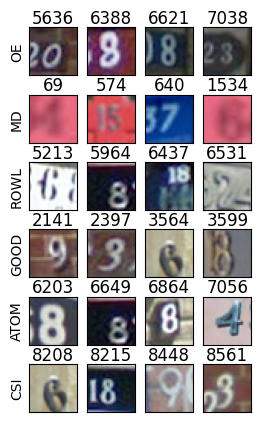

In [22]:
fig = plt.figure(figsize=(3,5))
outer = gridspec.GridSpec(len(l_detector), 1, wspace=0., hspace=0.4,)

for m_idx, dict_ in enumerate(data):

    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[m_idx, 0], wspace=0., hspace=0.)
    for i in range(4):
        ax = plt.Subplot(fig, plt_a[i])
        ax.imshow(dict_['img'][i])
        ax.set_title(dict_['rank'][i], pad=0.)
    # ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    # if m == 'nae' or m == 'ssd':
    #     ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    # else:
    #     ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
        if i == 0:
            ax.set_ylabel(f'{dict_["name"].upper()}', labelpad=0.)
        fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

## CelebA

In [23]:
size = 32; channel = 3
data_dict = {
    "path": "../datasets",
    "size": size,
    "channel": channel,
    "batch_size": 64,
    "n_workers": 4,
    "split": "evaluation",
    #              'split': 'validation',
}
data_dict_ = copy.copy(data_dict)
data_dict_['dataset'] = 'CelebA_OOD'
out_dl = get_dataloader(data_dict_)
out_ds = out_dl.dataset

Using No Augmentations
Using No Augmentations


In [24]:
l_detector = [('oe', 'pretrained/cifar_ood_oe_scratch/allconv/'), 
              ('md', 'pretrained/cifar_ood_md/md_resnet'),
              ('rowl', 'pretrained/cifar_ood_atom/rowl'),
              ('good', 'pretrained/cifar_ood_good/good80'),
              ('atom', 'pretrained/cifar_ood_atom/atom'),
              ('csi', 'pretrained/cifar_ood_csi')]

In [25]:
n_vis = 16
data = []
for detector_name, detector_path in l_detector:
    out_scores = torch.load(f'../{detector_path}/OOD_score_CelebA_OOD.pkl')    
    out_sorted_score, out_sorted_idx = torch.sort(out_scores)
    l_sorted_img = [out_ds[s][0].permute(1,2,0) for s in out_sorted_idx[:n_vis]]
    
    # score to rank
    in_scores = torch.load(f'../{detector_path}/IN_score.pkl')
    in_sorted_scores = np.sort(in_scores)
    out_rank = np.searchsorted(in_sorted_scores, out_sorted_score)
    data.append({'name': detector_name, 'img': l_sorted_img, 'score': out_sorted_score, 'rank': out_rank})

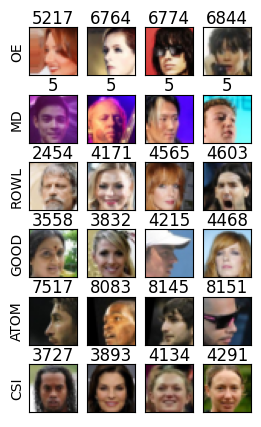

In [26]:
fig = plt.figure(figsize=(3,5))
outer = gridspec.GridSpec(len(l_detector), 1, wspace=0., hspace=0.4,)

for m_idx, dict_ in enumerate(data):

    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[m_idx, 0], wspace=0., hspace=0.)
    for i in range(4):
        ax = plt.Subplot(fig, plt_a[i])
        ax.imshow(dict_['img'][i])
        ax.set_title(dict_['rank'][i], pad=0.)
    # ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    # if m == 'nae' or m == 'ssd':
    #     ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    # else:
    #     ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
        if i == 0:
            ax.set_ylabel(f'{dict_["name"].upper()}', labelpad=0.)
        fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])